##  Build a machine learning model to predict salary  based on position for a given dataset


### Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning using libraries/')
from ipynb.fs.full.ml_library import *

# reading dataset file & storing it as pandas dataframe
salary_data = pd.read_csv('Position_Salaries.csv')
salary_data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


#### Plotting Salary vs Level

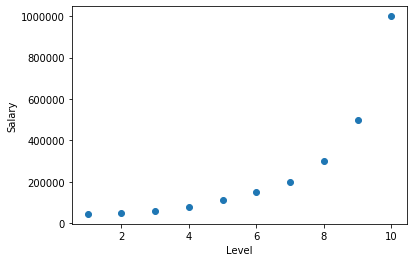

In [2]:
plt.scatter(salary_data['Level'], salary_data['Salary'])
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

#### Separating out feature & label columns

In [3]:
x_values = salary_data['Level'].values.reshape(-1,1)
y_values = salary_data['Salary'].values

#### Generating polynomial features

In [4]:
poly = PolynomialFeatures(degree=4)
x_values = poly.fit_transform(x_values)

#### Splitting dataset into train set & test set

In [5]:
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size=0.7, random_state=10)

### Buiding polynomial regression model

In [6]:
regressor = LinearRegression()
regressor.fit(train_x_values, train_y_values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Storing predictions for test set

In [7]:
test_prediction = regressor.predict(test_x_values)
train_prediction = regressor.predict(train_x_values)

#### Plotting model against data points

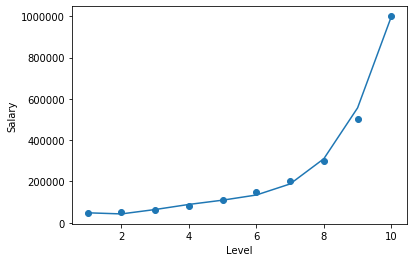

In [8]:
plt.scatter(salary_data['Level'], salary_data['Salary'])
plt.plot(salary_data['Level'], regressor.predict(x_values))
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

#### Calculating errors

In [9]:
mean_abs_error = metrics.mean_absolute_error(test_y_values, test_prediction)
mean_abs_error

25336.506235788645

In [10]:
mean_sqr_error = metrics.mean_squared_error(test_y_values, test_prediction)
mean_sqr_error

1146244016.5113235

In [11]:
root_mean_sq_error = np.sqrt(mean_sqr_error)
root_mean_sq_error

33856.22566842505

### Evaluating model against test set

In [12]:
print(f'r2_score: {metrics.r2_score(test_y_values, test_prediction)}')

r2_score: 0.968179530695244


In [13]:
accuracy_test = accuracy_regression(test_prediction, test_y_values)
accuracy_test

90.5712350251345